***Network Intrusion Detection***



***About Dataset***



* The dataset to be audited was provided which consists of a wide variety of intrusions simulated in a military network environment. It created an environment to acquire raw TCP/IP dump data for a network by simulating a typical US Air Force LAN. The LAN was focused like a real environment and blasted with multiple attacks. 
* There are 41 quantitative and qualitative features are obtained from normal and attack data (3 qualitative and 38 quantitative features). The class variable has two categories:
• Normal 
• Anomalous





**Importing Required Libraries**

In [535]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

**Reading Data File**

In [536]:
df = pd.read_csv('/content/Train_data.csv')

**Data Exploration**

In [537]:
df.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,class
0,0,tcp,ftp_data,SF,491,0,0,0,0,0,...,25,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,normal
1,0,udp,other,SF,146,0,0,0,0,0,...,1,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal
2,0,tcp,private,S0,0,0,0,0,0,0,...,26,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,anomaly
3,0,tcp,http,SF,232,8153,0,0,0,0,...,255,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal
4,0,tcp,http,SF,199,420,0,0,0,0,...,255,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal


In [538]:
df = df.rename(columns={'class': 'target'}) 

In [539]:
df.shape

(25192, 42)

In [540]:
df.info() #There is no null values in the Dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25192 entries, 0 to 25191
Data columns (total 42 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   duration                     25192 non-null  int64  
 1   protocol_type                25192 non-null  object 
 2   service                      25192 non-null  object 
 3   flag                         25192 non-null  object 
 4   src_bytes                    25192 non-null  int64  
 5   dst_bytes                    25192 non-null  int64  
 6   land                         25192 non-null  int64  
 7   wrong_fragment               25192 non-null  int64  
 8   urgent                       25192 non-null  int64  
 9   hot                          25192 non-null  int64  
 10  num_failed_logins            25192 non-null  int64  
 11  logged_in                    25192 non-null  int64  
 12  num_compromised              25192 non-null  int64  
 13  root_shell      

In [541]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
duration,25192.0,305.054104,2.686556e+03,0.0,0.00,0.00,0.00,42862.0
src_bytes,25192.0,24330.628215,2.410805e+06,0.0,0.00,44.00,279.00,381709090.0
dst_bytes,25192.0,3491.847174,8.883072e+04,0.0,0.00,0.00,530.25,5151385.0
land,25192.0,0.000079,8.909946e-03,0.0,0.00,0.00,0.00,1.0
wrong_fragment,25192.0,0.023738,2.602208e-01,0.0,0.00,0.00,0.00,3.0
urgent,25192.0,0.000040,6.300408e-03,0.0,0.00,0.00,0.00,1.0
hot,25192.0,0.198039,2.154202e+00,0.0,0.00,0.00,0.00,77.0
num_failed_logins,25192.0,0.001191,4.541818e-02,0.0,0.00,0.00,0.00,4.0
logged_in,25192.0,0.394768,4.888105e-01,0.0,0.00,0.00,1.00,1.0
num_compromised,25192.0,0.227850,1.041735e+01,0.0,0.00,0.00,0.00,884.0


***Splitting the Numerical & Categorical columns***

In [542]:
col_names=df.columns
num_cols = col_names.drop(['protocol_type', 'flag', 'service','target'])
num_cols

Index(['duration', 'src_bytes', 'dst_bytes', 'land', 'wrong_fragment',
       'urgent', 'hot', 'num_failed_logins', 'logged_in', 'num_compromised',
       'root_shell', 'su_attempted', 'num_root', 'num_file_creations',
       'num_shells', 'num_access_files', 'num_outbound_cmds', 'is_host_login',
       'is_guest_login', 'count', 'srv_count', 'serror_rate',
       'srv_serror_rate', 'rerror_rate', 'srv_rerror_rate', 'same_srv_rate',
       'diff_srv_rate', 'srv_diff_host_rate', 'dst_host_count',
       'dst_host_srv_count', 'dst_host_same_srv_rate',
       'dst_host_diff_srv_rate', 'dst_host_same_src_port_rate',
       'dst_host_srv_diff_host_rate', 'dst_host_serror_rate',
       'dst_host_srv_serror_rate', 'dst_host_rerror_rate',
       'dst_host_srv_rerror_rate'],
      dtype='object')

In [543]:
cat_cols = col_names.drop(['duration', 'src_bytes', 'dst_bytes', 'land', 'wrong_fragment',
       'urgent', 'hot', 'num_failed_logins', 'logged_in', 'num_compromised',
       'root_shell', 'su_attempted', 'num_root', 'num_file_creations',
       'num_shells', 'num_access_files', 'num_outbound_cmds', 'is_host_login',
       'is_guest_login', 'count', 'srv_count', 'serror_rate',
       'srv_serror_rate', 'rerror_rate', 'srv_rerror_rate', 'same_srv_rate',
       'diff_srv_rate', 'srv_diff_host_rate', 'dst_host_count',
       'dst_host_srv_count', 'dst_host_same_srv_rate',
       'dst_host_diff_srv_rate', 'dst_host_same_src_port_rate',
       'dst_host_srv_diff_host_rate', 'dst_host_serror_rate',
       'dst_host_srv_serror_rate', 'dst_host_rerror_rate',
       'dst_host_srv_rerror_rate'])
cat_cols

Index(['protocol_type', 'service', 'flag', 'target'], dtype='object')

***Plotting the Categorical Column***

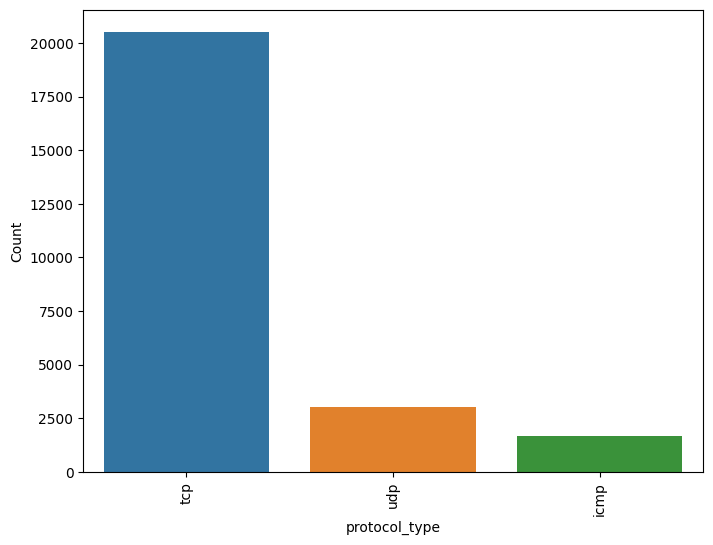

tcp     20526
udp      3011
icmp     1655
Name: protocol_type, dtype: int64


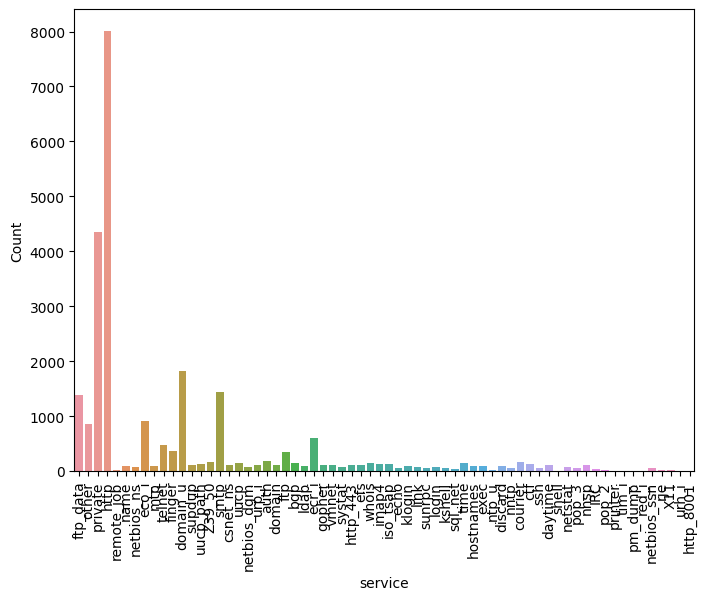

http         8003
private      4351
domain_u     1820
smtp         1449
ftp_data     1396
             ... 
urh_i           4
red_i           3
pm_dump         3
tim_i           2
http_8001       1
Name: service, Length: 66, dtype: int64


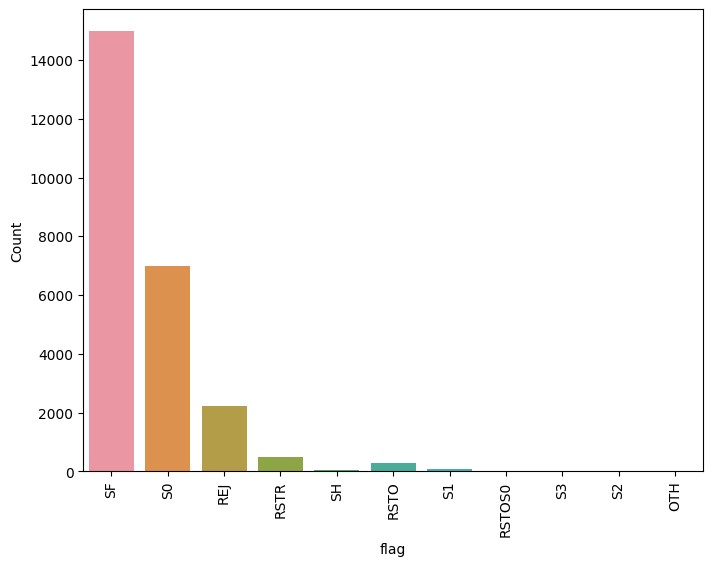

SF        14973
S0         7009
REJ        2216
RSTR        497
RSTO        304
S1           88
SH           43
RSTOS0       21
S2           21
S3           15
OTH           5
Name: flag, dtype: int64


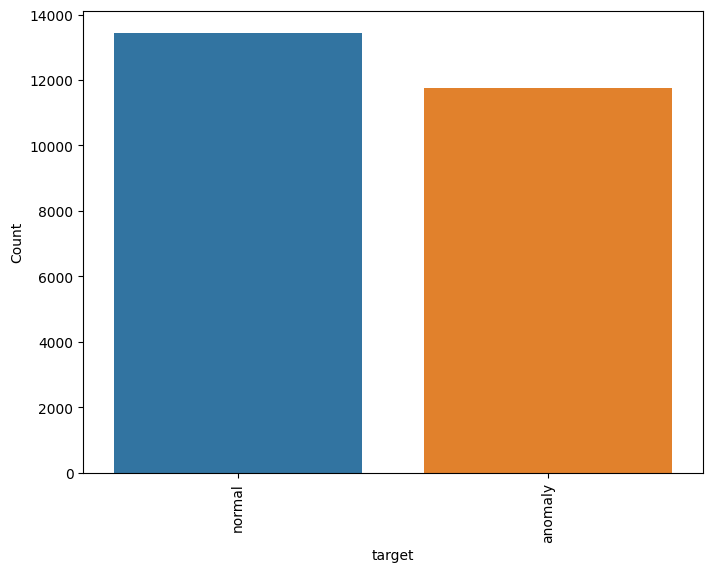

normal     13449
anomaly    11743
Name: target, dtype: int64


In [544]:
for col in df[cat_cols]:
    plt.figure(figsize=(8, 6))
    sns.countplot(x=col, data=df)
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.xticks(rotation=90)
    plt.show()

    value_counts = df[col].value_counts()
    print(value_counts)

And the target column is Balanced

***Outlier Handling***

In [545]:
#for i in df[num_cols]:
#    sns.boxplot(x=df[i])
#    plt.title(col)
#    plt.show()

In [546]:
def find_outliers_IQR(df):
   q1=df.quantile(0.25)
   q3=df.quantile(0.75)
   IQR=q3-q1
   outliers = df[((df<(q1-1.5*IQR)) | (df>(q3+1.5*IQR)))]
   return outliers

In [547]:
outliers=find_outliers_IQR(df[num_cols])
outliers

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,...,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,0.17,NaN,NaN,NaN,0.05,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,0.6,0.88,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,8153.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.01
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25187,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.00,1.00
25188,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,1.00,0.18,NaN,NaN,NaN,NaN
25189,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.00,1.00
25190,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [548]:
outliers.nunique()

duration                        757
src_bytes                      1157
dst_bytes                      2865
land                              1
wrong_fragment                    2
urgent                            1
hot                              21
num_failed_logins                 4
logged_in                         0
num_compromised                  27
root_shell                        1
su_attempted                      2
num_root                         27
num_file_creations               19
num_shells                        1
num_access_files                  6
num_outbound_cmds                 0
is_host_login                     0
is_guest_login                    1
count                           115
srv_count                       372
serror_rate                       0
srv_serror_rate                   0
rerror_rate                      71
srv_rerror_rate                  41
same_srv_rate                     0
diff_srv_rate                    63
srv_diff_host_rate          

In [549]:
def remove_outliers_IQR(data, columns, low_percentile=0.25, high_percentile=0.75):
    filtered_data = data.copy()
    for column in columns:
        q1 = filtered_data[column].quantile(low_percentile)
        q3 = filtered_data[column].quantile(high_percentile)
        iqr = q3 - q1
        upper_bound = q3 + 1.5 * iqr
        lower_bound = q1 - 1.5 * iqr
        filtered_data = filtered_data[(filtered_data[column] >= lower_bound) & (filtered_data[column] <= upper_bound)]
    return filtered_data

In [550]:
df_num = remove_outliers_IQR(df[num_cols],['dst_bytes'])

In [551]:
df_num.shape # Data's retained after outlier handling

(20493, 38)

***Feature Scaling the Numerical columns***

In [552]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_X = scaler.fit_transform(df_num)

In [553]:
scaled_X = pd.DataFrame(scaled_X, columns = df_num.columns)

In [554]:
scaled_X

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,...,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate
0,-0.114691,-0.010334,-0.492832,-0.009879,-0.101239,0.0,-0.067816,-0.024306,-0.589654,-0.020961,...,-0.477170,-0.639083,-0.587920,-0.343098,0.008702,-0.281680,-0.740654,-0.724229,-0.277220,-0.411365
1,-0.114691,-0.010463,-0.492832,-0.009879,-0.101239,0.0,-0.067816,-0.024306,-0.589654,-0.020961,...,0.640774,-0.873216,-0.979301,2.475535,2.162032,-0.281680,-0.740654,-0.724229,-0.427349,-0.411365
2,-0.114691,-0.010518,-0.492832,-0.009879,-0.101239,0.0,-0.067816,-0.024306,-0.589654,-0.020961,...,0.640774,-0.629327,-0.749077,-0.244198,-0.506884,-0.281680,1.386301,1.394417,-0.427349,-0.411365
3,-0.114691,-0.010443,1.131022,-0.009879,-0.101239,0.0,-0.067816,-0.024306,1.695910,-0.020961,...,0.640774,1.604688,1.322940,-0.491447,-0.506884,-0.281680,-0.740654,-0.724229,-0.427349,-0.411365
4,-0.114691,-0.010518,-0.492832,-0.009879,-0.101239,0.0,-0.067816,-0.024306,-0.589654,-0.020961,...,0.640774,-0.697616,-0.818145,-0.145299,-0.506884,-0.281680,-0.740654,-0.724229,2.575234,2.492824
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20488,-0.114691,-0.010518,-0.492832,-0.009879,-0.101239,0.0,-0.067816,-0.024306,-0.589654,-0.020961,...,0.640774,-0.814682,-0.910234,-0.194749,-0.506884,-0.281680,-0.740654,-0.724229,2.575234,2.492824
20489,-0.114691,-0.010392,-0.492832,-0.009879,-0.101239,0.0,-0.067816,-0.024306,1.695910,-0.020961,...,-2.063585,-0.502506,1.322940,-0.491447,2.525976,1.239614,-0.740654,-0.724229,-0.427349,-0.411365
20490,-0.114691,-0.010518,-0.492832,-0.009879,-0.101239,0.0,-0.067816,-0.024306,-0.589654,-0.020961,...,0.640774,-0.756149,-0.864189,-0.145299,-0.506884,-0.281680,-0.740654,-0.724229,2.575234,2.492824
20491,-0.114691,-0.010518,-0.492832,-0.009879,-0.101239,0.0,-0.067816,-0.024306,-0.589654,-0.020961,...,0.640774,-0.687861,-0.795122,-0.194749,-0.506884,-0.281680,1.386301,1.394417,-0.427349,-0.411365


***Encoding the Categorical columns***

In [555]:
df_cat=df[cat_cols]

In [556]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
df_encode = (df_cat).apply(encoder.fit_transform)

In [557]:
df1 = pd.concat([scaled_X,df_encode],axis=1) #Concatting the Numerical & Categorical Columns

In [558]:
df1.isnull().sum() 

duration                       4699
src_bytes                      4699
dst_bytes                      4699
land                           4699
wrong_fragment                 4699
urgent                         4699
hot                            4699
num_failed_logins              4699
logged_in                      4699
num_compromised                4699
root_shell                     4699
su_attempted                   4699
num_root                       4699
num_file_creations             4699
num_shells                     4699
num_access_files               4699
num_outbound_cmds              4699
is_host_login                  4699
is_guest_login                 4699
count                          4699
srv_count                      4699
serror_rate                    4699
srv_serror_rate                4699
rerror_rate                    4699
srv_rerror_rate                4699
same_srv_rate                  4699
diff_srv_rate                  4699
srv_diff_host_rate          

In [559]:
df1 = df1.dropna()

***Splitting the X & Y variables***

In [560]:
X = df1.drop(['target'], axis=1)
y = df1['target']

***Applying PCA for Dimensionality Reduction ***

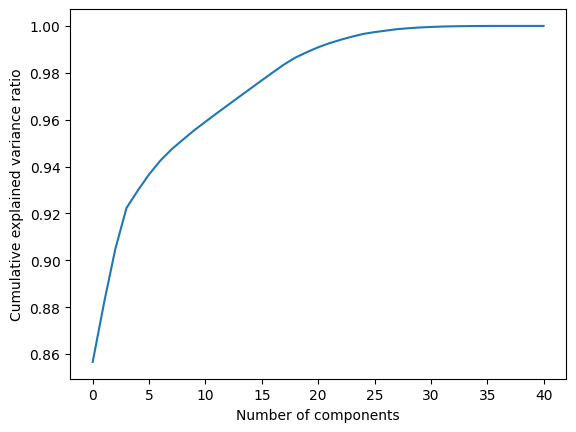

In [561]:
from sklearn.decomposition import PCA
pca = PCA()
pca.fit(X)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of components')
plt.ylabel('Cumulative explained variance ratio')
plt.show()

From the plot we chose the principal componenets as 3.

In [562]:
n_components = 9
pca = PCA(n_components=n_components)
pc = pca.fit_transform(X)

In [563]:
print('Explained variance ratio:', np.cumsum(pca.explained_variance_ratio_))

Explained variance ratio: [0.8566672  0.88171562 0.9047014  0.92236939 0.92975938 0.9366667
 0.94254069 0.94735658 0.95143723]


In [564]:
pc = pd.DataFrame(data=pc, columns=['PC1','PC2','PC3','PC4','PC5','PC6','PC7','PC8','PC9'])

In [565]:
pc

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9
0,-10.201012,-1.193282,-1.262585,-0.250785,-0.357823,0.253679,0.158777,0.561085,-0.041707
1,11.771015,-0.439026,-2.661119,0.895453,-0.926301,0.852054,1.077369,2.670228,-0.135934
2,16.973724,3.438404,0.463891,-1.046526,-0.057596,0.270157,-0.338524,-0.185505,-0.025721
3,-7.205886,-2.923590,-0.979032,-1.496165,1.253083,-1.112159,-0.761789,0.276444,-0.039146
4,-7.202829,-0.186972,-1.902482,4.942593,0.825399,-0.679998,-0.716185,-1.422152,-0.065924
...,...,...,...,...,...,...,...,...,...
20488,-26.176868,0.120789,-0.960390,5.035089,0.837633,-0.500732,-0.868483,-1.372248,-0.074329
20489,-7.205016,-3.200192,-0.972294,-0.860037,-1.681159,1.507154,0.174875,0.150175,-0.155218
20490,21.758037,-0.431779,-3.390139,4.895831,0.835749,-0.584846,-0.854499,-1.357729,-0.085385
20491,-7.201926,2.856435,-2.216916,-1.183562,-0.064932,0.226660,-0.242103,-0.160462,0.010558


In [566]:
df2 = pd.concat([pc,y],axis=1)
df2

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,target
0,-10.201012,-1.193282,-1.262585,-0.250785,-0.357823,0.253679,0.158777,0.561085,-0.041707,1
1,11.771015,-0.439026,-2.661119,0.895453,-0.926301,0.852054,1.077369,2.670228,-0.135934,1
2,16.973724,3.438404,0.463891,-1.046526,-0.057596,0.270157,-0.338524,-0.185505,-0.025721,0
3,-7.205886,-2.923590,-0.979032,-1.496165,1.253083,-1.112159,-0.761789,0.276444,-0.039146,1
4,-7.202829,-0.186972,-1.902482,4.942593,0.825399,-0.679998,-0.716185,-1.422152,-0.065924,1
...,...,...,...,...,...,...,...,...,...,...
20488,-26.176868,0.120789,-0.960390,5.035089,0.837633,-0.500732,-0.868483,-1.372248,-0.074329,1
20489,-7.205016,-3.200192,-0.972294,-0.860037,-1.681159,1.507154,0.174875,0.150175,-0.155218,1
20490,21.758037,-0.431779,-3.390139,4.895831,0.835749,-0.584846,-0.854499,-1.357729,-0.085385,1
20491,-7.201926,2.856435,-2.216916,-1.183562,-0.064932,0.226660,-0.242103,-0.160462,0.010558,1


In [567]:
X = df2.drop(['target'], axis=1)
y = df2['target']

***Splitting the data into Train & Test***

In [568]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,train_size=0.70, random_state=101)

***Model Building***

In [569]:
from sklearn.model_selection import KFold,cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

In [570]:
train_accu = []
test_accu = []
result_df = pd.DataFrame()
for i in range(1,15):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    train_accu.append(knn.score(X_train,y_train)*100)
    test_accu.append(accuracy_score(y_test,knn.predict(X_test))*100)
result_df['k_value'] = list(range(1,15))
result_df['train_accu'] = train_accu
result_df['test_accu'] = test_accu
result_df['gen_gap'] = abs(result_df['train_accu']-result_df['test_accu'])

In [571]:
result_df

,k_value,train_accu,test_accu,gen_gap
0,1,100.000000,92.957059,7.042941
1,2,96.688742,92.566688,4.122053
2,3,96.681771,94.583604,2.098166
3,4,96.277449,94.583604,1.693844
4,5,96.110143,94.957710,1.152433
5,6,95.942837,94.876383,1.066455
6,7,95.984664,94.827586,1.157077
7,8,95.817358,94.876383,0.940975
8,9,95.705821,94.795055,0.910766
9,10,95.719763,94.860117,0.859646


***Using K-Fold Cross Validation***

In [572]:
n_folds = 5
kfold = KFold(n_splits=n_folds, shuffle=True, random_state=101)

model_log = LogisticRegression()
model_rfc=RandomForestClassifier()
model_knn=KNeighborsClassifier(n_neighbors=7)
model_svc=SVC()

scores_log = cross_val_score(model_log,X_train,y_train,
                         scoring='f1',cv=kfold)
scores_rfc = cross_val_score(model_rfc,X_train,y_train,
                         scoring='f1',cv=kfold)
scores_knn = cross_val_score(model_knn,X_train,y_train,
                         scoring='f1',cv=kfold)
scores_svc = cross_val_score(model_svc,X_train,y_train,
                         scoring='f1',cv=kfold)

print('Logistic Cross-validation scores:', scores_log)
print('Logistic Average score:', np.mean(scores_log))

print('Random Forest Cross-validation scores:', scores_rfc)
print('Random Forest Average score:', np.mean(scores_rfc))

print('KNN Cross-validation scores:', scores_knn)
print('KNN Average score:', np.mean(scores_knn))

print('SVC Cross-validation scores:', scores_svc)
print('SVC Average score:', np.mean(scores_svc))

Logistic Cross-validation scores: [0.89509202 0.88702669 0.89226869 0.89133089 0.89774802]
Logistic Average score: 0.8926932647655871
Random Forest Cross-validation scores: [0.9563823  0.95973813 0.95858383 0.96198454 0.96996805]
Random Forest Average score: 0.9613313704172104
KNN Cross-validation scores: [0.95186136 0.95234987 0.95649264 0.95876289 0.96199297]
KNN Average score: 0.9562919454949863
SVC Cross-validation scores: [0.9019016  0.90136571 0.90604651 0.90466165 0.91099164]
SVC Average score: 0.9049934215868856


In [573]:
LogisticRegression=model_log.fit(X_train,y_train)
RFC=model_rfc.fit(X_train,y_train)
KNN=model_knn.fit(X_train,y_train)
SVC=model_svc.fit(X_train,y_train)

***Model Comparision***

In [574]:
Result={"Model":[],"Accuracy":[],"Precision":[],"f1-score":[]}

In [575]:
from sklearn.metrics import *

In [576]:
for i in (LogisticRegression,RFC,KNN,SVC):
  y_pred=i.predict(X_test)
  Result["Accuracy"].append(accuracy_score(y_test,y_pred))
  Result["Precision"].append(precision_score(y_test,y_pred))
  Result["f1-score"].append(f1_score(y_test,y_pred))

In [577]:
Result["Model"]=("LogisticRegression","RFC","KNN","SVC")

In [578]:
Result=pd.DataFrame(Result)
Result

,Model,Accuracy,Precision,f1-score
0,LogisticRegression,0.871340,0.837466,0.887081
1,RFC,0.950878,0.951705,0.954298
2,KNN,0.948276,0.948208,0.951935
3,SVC,0.884027,0.833247,0.900544


***By comparing the models the Random Forest Classifer & KNN performs well with 95% Accuracy***